In [22]:
import numpy as np
import itertools
import scipy
from SINDyFunctions import *
import matplotlib.pyplot as plt

In [ ]:
# ---simulate Lorenz system and add noise---
# system parameters
sigma = 10
rho = 28
beta = 8/3

# simulate
X0 = np.array([20,12,-30])
t_sim = 10
gridDensity = 1000
t_span = [0,t_sim]
[t_out,X_clean,X_dot_out] = simulateLorenzSystem(X0,t_sim,gridDensity,sigma,rho,beta)

# add noise
MD = t_sim*gridDensity*3
arr_sig_NR = np.hstack((np.logspace(-6,-2,5),np.linspace(0.05,0.4,8)))   # array of noise ratios
N_noise = 5   # number of noises to try at each noise level
arr_X_noisy = np.zeros((X_clean.shape[0],X_clean.shape[1],len(arr_sig_NR),N_noise)) # allocte a 4-way array for storing noisy trajectory data

rng = np.random.default_rng(seed=0)
for i in range(0,len(arr_sig_NR)):
    sig_NR = arr_sig_NR[i]
    sig = sig_NR*np.linalg.norm(X_clean,"fro")/np.sqrt(MD)
    for j in range(0,N_noise):
        X_noisy = X_clean+rng.normal(0,sig,size=X_clean.shape)
        arr_X_noisy[:,:,i,j] = X_noisy

# true coefficient matrix (up to fifth-order polynomials)
Theta,exps = calcTheta_poly_3D(t_out[1:-1],X_clean[1:-1,0],X_clean[1:-1,1],X_clean[1:-1,2],order=5)
w_true = trueCoeffMatrix_Lorenz(exps,sigma,rho,beta)

In [24]:
# ---Fourier weak SINDy (FFT frequency selections)---
# sparse regression settings
params_regression = dict()
params_regression["method"] = "ridge"
params_regression["lambda_sparse"] = 0.5
params_regression["lambda_ridge"] = 0.0
params_regression["N_loops"] = 100

# evaluate error at different noise levels
N_freq = 100
arr_w_FFTWSINDy_FFT = np.zeros((w_true.shape[0],w_true.shape[1],len(arr_sig_NR),N_noise))

for i in range(0,len(arr_sig_NR)):
    for j in range(0,N_noise):
        X_noisy = arr_X_noisy[:,:,i,j]
        w_ident = WSINDy_FFT_FFT_3D(t_out,X_noisy,X_clean,N_freq,params_regression,polyOrder=5)
        arr_w_FFTWSINDy_FFT[:,:,i,j] = w_ident
        print(f"Progress 1/3: {i*N_noise+(j+1)}/{len(arr_sig_NR)*N_noise}")

Progress 1/3: 1/65
Progress 1/3: 2/65
Progress 1/3: 3/65
Progress 1/3: 4/65
Progress 1/3: 5/65
Progress 1/3: 6/65
Progress 1/3: 7/65
Progress 1/3: 8/65
Progress 1/3: 9/65
Progress 1/3: 10/65
Progress 1/3: 11/65
Progress 1/3: 12/65
Progress 1/3: 13/65
Progress 1/3: 14/65
Progress 1/3: 15/65
Progress 1/3: 16/65
Progress 1/3: 17/65
Progress 1/3: 18/65
Progress 1/3: 19/65
Progress 1/3: 20/65
Progress 1/3: 21/65
Progress 1/3: 22/65
Progress 1/3: 23/65
Progress 1/3: 24/65
Progress 1/3: 25/65
Progress 1/3: 26/65
Progress 1/3: 27/65
Progress 1/3: 28/65
Progress 1/3: 29/65
Progress 1/3: 30/65
Progress 1/3: 31/65
Progress 1/3: 32/65
Progress 1/3: 33/65
Progress 1/3: 34/65
Progress 1/3: 35/65
Progress 1/3: 36/65
Progress 1/3: 37/65
Progress 1/3: 38/65
Progress 1/3: 39/65
Progress 1/3: 40/65
Progress 1/3: 41/65
Progress 1/3: 42/65
Progress 1/3: 43/65
Progress 1/3: 44/65
Progress 1/3: 45/65
Progress 1/3: 46/65
Progress 1/3: 47/65
Progress 1/3: 48/65
Progress 1/3: 49/65
Progress 1/3: 50/65
Progress 

In [25]:
# ---Fourier weak SINDy (PSD frequency selections)---
# sparse regression settings
params_regression = dict()
params_regression["method"] = "ridge"
params_regression["lambda_sparse"] = 0.5
params_regression["lambda_ridge"] = 0.0
params_regression["N_loops"] = 100

# evaluate error at different noise levels
N_freq = 100
arr_w_FFTWSINDy_PSD = np.zeros((w_true.shape[0],w_true.shape[1],len(arr_sig_NR),N_noise))

for i in range(0,len(arr_sig_NR)):
    for j in range(0,N_noise):
        X_noisy = arr_X_noisy[:,:,i,j]
        w_ident = WSINDy_FFT_PSD_3D(t_out,X_noisy,N_freq,params_regression,polyOrder=5)
        arr_w_FFTWSINDy_PSD[:,:,i,j] = w_ident
        print(f"Progress 2/3: {i*N_noise+(j+1)}/{len(arr_sig_NR)*N_noise}")

Progress 2/3: 1/65
Progress 2/3: 2/65
Progress 2/3: 3/65
Progress 2/3: 4/65
Progress 2/3: 5/65
Progress 2/3: 6/65
Progress 2/3: 7/65
Progress 2/3: 8/65
Progress 2/3: 9/65
Progress 2/3: 10/65
Progress 2/3: 11/65
Progress 2/3: 12/65
Progress 2/3: 13/65
Progress 2/3: 14/65
Progress 2/3: 15/65
Progress 2/3: 16/65
Progress 2/3: 17/65
Progress 2/3: 18/65
Progress 2/3: 19/65
Progress 2/3: 20/65
Progress 2/3: 21/65
Progress 2/3: 22/65
Progress 2/3: 23/65
Progress 2/3: 24/65
Progress 2/3: 25/65
Progress 2/3: 26/65
Progress 2/3: 27/65
Progress 2/3: 28/65
Progress 2/3: 29/65
Progress 2/3: 30/65
Progress 2/3: 31/65
Progress 2/3: 32/65
Progress 2/3: 33/65
Progress 2/3: 34/65
Progress 2/3: 35/65
Progress 2/3: 36/65
Progress 2/3: 37/65
Progress 2/3: 38/65
Progress 2/3: 39/65
Progress 2/3: 40/65
Progress 2/3: 41/65
Progress 2/3: 42/65
Progress 2/3: 43/65
Progress 2/3: 44/65
Progress 2/3: 45/65
Progress 2/3: 46/65
Progress 2/3: 47/65
Progress 2/3: 48/65
Progress 2/3: 49/65
Progress 2/3: 50/65
Progress 

In [26]:
# ---Fourier weak SINDy (brute-force sweep)---
# sparse regression settings
params_regression = dict()
params_regression["method"] = "ridge"
params_regression["lambda_sparse"] = 0.5
params_regression["lambda_ridge"] = 0.0
params_regression["N_loops"] = 100

# evaluate error at different noise levels
N_freq = 500
arr_w_FFTWSINDy_sweep = np.zeros((w_true.shape[0],w_true.shape[1],len(arr_sig_NR),N_noise))

for i in range(0,len(arr_sig_NR)):
    for j in range(0,N_noise):
        X_noisy = arr_X_noisy[:,:,i,j]
        w_ident = WSINDy_Fourier_FFT_Lorenz(t_out,X_noisy,N_freq,params_regression,polyOrder=5)
        arr_w_FFTWSINDy_sweep[:,:,i,j] = w_ident
        print(f"Progress 3/3: {i*N_noise+(j+1)}/{len(arr_sig_NR)*N_noise}")

Progress 3/3: 1/65
Progress 3/3: 2/65
Progress 3/3: 3/65
Progress 3/3: 4/65
Progress 3/3: 5/65
Progress 3/3: 6/65
Progress 3/3: 7/65
Progress 3/3: 8/65
Progress 3/3: 9/65
Progress 3/3: 10/65
Progress 3/3: 11/65
Progress 3/3: 12/65
Progress 3/3: 13/65
Progress 3/3: 14/65
Progress 3/3: 15/65
Progress 3/3: 16/65
Progress 3/3: 17/65
Progress 3/3: 18/65
Progress 3/3: 19/65
Progress 3/3: 20/65
Progress 3/3: 21/65
Progress 3/3: 22/65
Progress 3/3: 23/65
Progress 3/3: 24/65
Progress 3/3: 25/65
Progress 3/3: 26/65
Progress 3/3: 27/65
Progress 3/3: 28/65
Progress 3/3: 29/65
Progress 3/3: 30/65
Progress 3/3: 31/65
Progress 3/3: 32/65
Progress 3/3: 33/65
Progress 3/3: 34/65
Progress 3/3: 35/65
Progress 3/3: 36/65
Progress 3/3: 37/65
Progress 3/3: 38/65
Progress 3/3: 39/65
Progress 3/3: 40/65
Progress 3/3: 41/65
Progress 3/3: 42/65
Progress 3/3: 43/65
Progress 3/3: 44/65
Progress 3/3: 45/65
Progress 3/3: 46/65
Progress 3/3: 47/65
Progress 3/3: 48/65
Progress 3/3: 49/65
Progress 3/3: 50/65
Progress 

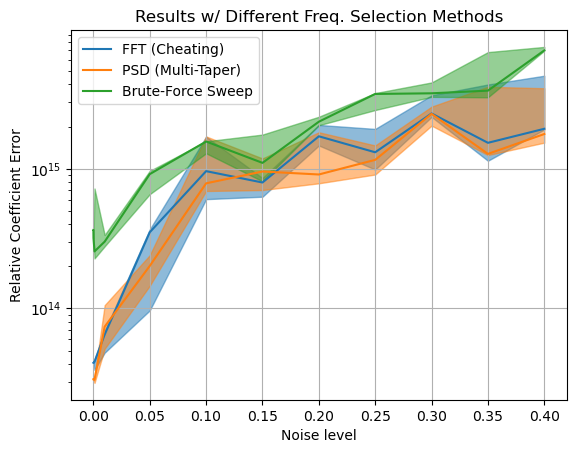

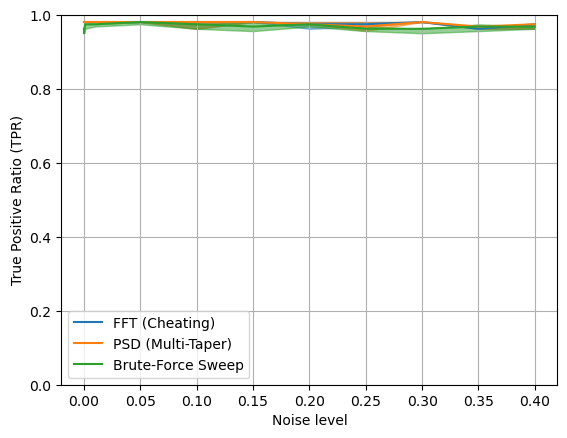

In [27]:
# ---statistics---
res_FFT = batchErrorEval(w_true,arr_w_FFTWSINDy_FFT)
res_PSD = batchErrorEval(w_true,arr_w_FFTWSINDy_PSD)
res_sweep = batchErrorEval(w_true,arr_w_FFTWSINDy_sweep)

# ---Noise level vs. coefficient error---
plt.figure()
plotWithQuartiles(arr_sig_NR,res_FFT["error_mean"],res_FFT["error_q1"],res_FFT["error_q3"],"FFT (Cheating)","C0")
plotWithQuartiles(arr_sig_NR,res_PSD["error_mean"],res_PSD["error_q1"],res_PSD["error_q3"],"PSD (Multi-Taper)","C1")
plotWithQuartiles(arr_sig_NR,res_sweep["error_mean"],res_sweep["error_q1"],res_sweep["error_q3"],"Brute-Force Sweep","C2")
# plt.xscale("log")
plt.yscale("log")
plt.xlabel("Noise level")
plt.ylabel("Relative Coefficient Error")
plt.title("Results w/ Different Freq. Selection Methods")
plt.legend()
plt.grid(True)

# ---Noise level vs. TPR---
plt.figure()
plt.ylim(0,1.0)
plotWithQuartiles(arr_sig_NR,res_FFT["TPR_mean"],res_FFT["TPR_q1"],res_FFT["TPR_q3"],"FFT (Cheating)","C0")
plotWithQuartiles(arr_sig_NR, res_PSD["TPR_mean"],res_PSD["TPR_q1"],res_PSD["TPR_q3"],"PSD (Multi-Taper)","C1")
plotWithQuartiles(arr_sig_NR, res_sweep["TPR_mean"],res_sweep["TPR_q1"],res_sweep["TPR_q3"],"Brute-Force Sweep","C2")
# plt.xscale("log")
# plt.yscale("log")
plt.xlabel("Noise level")
plt.ylabel("True Positive Ratio (TPR)")
plt.legend()
plt.grid(True)

plt.show()

In [28]:
# ---Fourier weak SINDy (FFT frequency selections)---
# sparse regression settings
params_regression = dict()
params_regression["method"] = "ridge"
params_regression["lambda_sparse"] = 0.5
params_regression["lambda_ridge"] = 0.0001
params_regression["N_loops"] = 100

# evaluate error at different noise levels
N_freq = 100
arr_w_FFTWSINDy_FFT = np.zeros((w_true.shape[0],w_true.shape[1],len(arr_sig_NR),N_noise))

for i in range(0,len(arr_sig_NR)):
    for j in range(0,N_noise):
        X_noisy = arr_X_noisy[:,:,i,j]
        w_ident = WSINDy_FFT_FFT_3D(t_out,X_noisy,X_clean,N_freq,params_regression,polyOrder=5)
        arr_w_FFTWSINDy_FFT[:,:,i,j] = w_ident
        print(f"Progress 1/3: {i*N_noise+(j+1)}/{len(arr_sig_NR)*N_noise}")

Progress 1/3: 1/65
Progress 1/3: 2/65
Progress 1/3: 3/65
Progress 1/3: 4/65
Progress 1/3: 5/65
Progress 1/3: 6/65
Progress 1/3: 7/65
Progress 1/3: 8/65
Progress 1/3: 9/65
Progress 1/3: 10/65
Progress 1/3: 11/65
Progress 1/3: 12/65
Progress 1/3: 13/65
Progress 1/3: 14/65
Progress 1/3: 15/65
Progress 1/3: 16/65
Progress 1/3: 17/65
Progress 1/3: 18/65
Progress 1/3: 19/65
Progress 1/3: 20/65
Progress 1/3: 21/65
Progress 1/3: 22/65
Progress 1/3: 23/65
Progress 1/3: 24/65
Progress 1/3: 25/65
Progress 1/3: 26/65
Progress 1/3: 27/65
Progress 1/3: 28/65
Progress 1/3: 29/65
Progress 1/3: 30/65
Progress 1/3: 31/65
Progress 1/3: 32/65
Progress 1/3: 33/65
Progress 1/3: 34/65
Progress 1/3: 35/65
Progress 1/3: 36/65
Progress 1/3: 37/65
Progress 1/3: 38/65
Progress 1/3: 39/65
Progress 1/3: 40/65
Progress 1/3: 41/65
Progress 1/3: 42/65
Progress 1/3: 43/65
Progress 1/3: 44/65
Progress 1/3: 45/65
Progress 1/3: 46/65
Progress 1/3: 47/65
Progress 1/3: 48/65
Progress 1/3: 49/65
Progress 1/3: 50/65
Progress 

In [29]:
# ---Fourier weak SINDy (PSD frequency selections)---
# sparse regression settings
params_regression = dict()
params_regression["method"] = "ridge"
params_regression["lambda_sparse"] = 0.5
params_regression["lambda_ridge"] = 0.0001
params_regression["N_loops"] = 100

# evaluate error at different noise levels
N_freq = 100
arr_w_FFTWSINDy_PSD = np.zeros((w_true.shape[0],w_true.shape[1],len(arr_sig_NR),N_noise))

for i in range(0,len(arr_sig_NR)):
    for j in range(0,N_noise):
        X_noisy = arr_X_noisy[:,:,i,j]
        w_ident = WSINDy_FFT_PSD_3D(t_out,X_noisy,N_freq,params_regression,polyOrder=5)
        arr_w_FFTWSINDy_PSD[:,:,i,j] = w_ident
        print(f"Progress 2/3: {i*N_noise+(j+1)}/{len(arr_sig_NR)*N_noise}")

Progress 2/3: 1/65
Progress 2/3: 2/65
Progress 2/3: 3/65
Progress 2/3: 4/65
Progress 2/3: 5/65
Progress 2/3: 6/65
Progress 2/3: 7/65
Progress 2/3: 8/65
Progress 2/3: 9/65
Progress 2/3: 10/65
Progress 2/3: 11/65
Progress 2/3: 12/65
Progress 2/3: 13/65
Progress 2/3: 14/65
Progress 2/3: 15/65
Progress 2/3: 16/65
Progress 2/3: 17/65
Progress 2/3: 18/65
Progress 2/3: 19/65
Progress 2/3: 20/65
Progress 2/3: 21/65
Progress 2/3: 22/65
Progress 2/3: 23/65
Progress 2/3: 24/65
Progress 2/3: 25/65
Progress 2/3: 26/65
Progress 2/3: 27/65
Progress 2/3: 28/65
Progress 2/3: 29/65
Progress 2/3: 30/65
Progress 2/3: 31/65
Progress 2/3: 32/65
Progress 2/3: 33/65
Progress 2/3: 34/65
Progress 2/3: 35/65
Progress 2/3: 36/65
Progress 2/3: 37/65
Progress 2/3: 38/65
Progress 2/3: 39/65
Progress 2/3: 40/65
Progress 2/3: 41/65
Progress 2/3: 42/65
Progress 2/3: 43/65
Progress 2/3: 44/65
Progress 2/3: 45/65
Progress 2/3: 46/65
Progress 2/3: 47/65
Progress 2/3: 48/65
Progress 2/3: 49/65
Progress 2/3: 50/65
Progress 

In [30]:
# ---Fourier weak SINDy (brute-force sweep)---
# sparse regression settings
params_regression = dict()
params_regression["method"] = "ridge"
params_regression["lambda_sparse"] = 0.5
params_regression["lambda_ridge"] = 0.0001
params_regression["N_loops"] = 100

# evaluate error at different noise levels
N_freq = 500
arr_w_FFTWSINDy_sweep = np.zeros((w_true.shape[0],w_true.shape[1],len(arr_sig_NR),N_noise))

for i in range(0,len(arr_sig_NR)):
    for j in range(0,N_noise):
        X_noisy = arr_X_noisy[:,:,i,j]
        w_ident = WSINDy_Fourier_FFT_Lorenz(t_out,X_noisy,N_freq,params_regression,polyOrder=5)
        arr_w_FFTWSINDy_sweep[:,:,i,j] = w_ident
        print(f"Progress 3/3: {i*N_noise+(j+1)}/{len(arr_sig_NR)*N_noise}")

Progress 3/3: 1/65
Progress 3/3: 2/65
Progress 3/3: 3/65
Progress 3/3: 4/65
Progress 3/3: 5/65
Progress 3/3: 6/65
Progress 3/3: 7/65
Progress 3/3: 8/65
Progress 3/3: 9/65
Progress 3/3: 10/65
Progress 3/3: 11/65
Progress 3/3: 12/65
Progress 3/3: 13/65
Progress 3/3: 14/65
Progress 3/3: 15/65
Progress 3/3: 16/65
Progress 3/3: 17/65
Progress 3/3: 18/65
Progress 3/3: 19/65
Progress 3/3: 20/65
Progress 3/3: 21/65
Progress 3/3: 22/65
Progress 3/3: 23/65
Progress 3/3: 24/65
Progress 3/3: 25/65
Progress 3/3: 26/65
Progress 3/3: 27/65
Progress 3/3: 28/65
Progress 3/3: 29/65
Progress 3/3: 30/65
Progress 3/3: 31/65
Progress 3/3: 32/65
Progress 3/3: 33/65
Progress 3/3: 34/65
Progress 3/3: 35/65
Progress 3/3: 36/65
Progress 3/3: 37/65
Progress 3/3: 38/65
Progress 3/3: 39/65
Progress 3/3: 40/65
Progress 3/3: 41/65
Progress 3/3: 42/65
Progress 3/3: 43/65
Progress 3/3: 44/65
Progress 3/3: 45/65
Progress 3/3: 46/65
Progress 3/3: 47/65
Progress 3/3: 48/65
Progress 3/3: 49/65
Progress 3/3: 50/65
Progress 

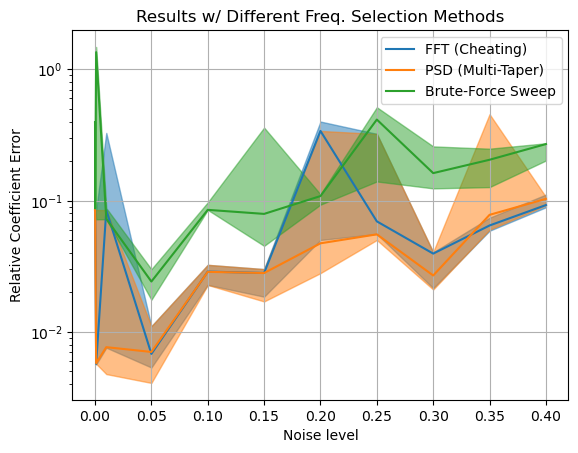

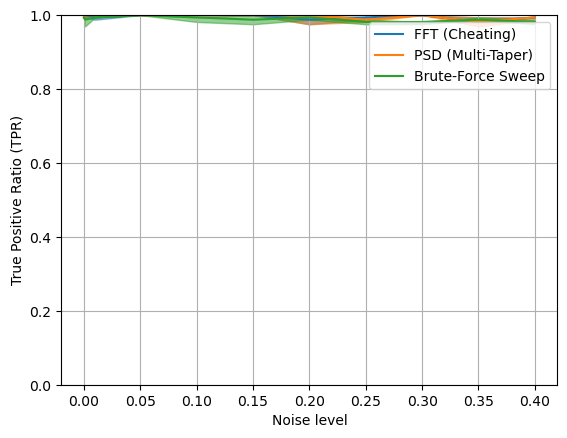

In [31]:
# ---statistics---
res_FFT = batchErrorEval(w_true,arr_w_FFTWSINDy_FFT)
res_PSD = batchErrorEval(w_true,arr_w_FFTWSINDy_PSD)
res_sweep = batchErrorEval(w_true,arr_w_FFTWSINDy_sweep)

# ---Noise level vs. coefficient error---
plt.figure()
plotWithQuartiles(arr_sig_NR,res_FFT["error_mean"],res_FFT["error_q1"],res_FFT["error_q3"],"FFT (Cheating)","C0")
plotWithQuartiles(arr_sig_NR,res_PSD["error_mean"],res_PSD["error_q1"],res_PSD["error_q3"],"PSD (Multi-Taper)","C1")
plotWithQuartiles(arr_sig_NR,res_sweep["error_mean"],res_sweep["error_q1"],res_sweep["error_q3"],"Brute-Force Sweep","C2")
# plt.xscale("log")
plt.yscale("log")
plt.xlabel("Noise level")
plt.ylabel("Relative Coefficient Error")
plt.title("Results w/ Different Freq. Selection Methods")
plt.legend()
plt.grid(True)

# ---Noise level vs. TPR---
plt.figure()
plt.ylim(0,1.0)
plotWithQuartiles(arr_sig_NR,res_FFT["TPR_mean"],res_FFT["TPR_q1"],res_FFT["TPR_q3"],"FFT (Cheating)","C0")
plotWithQuartiles(arr_sig_NR, res_PSD["TPR_mean"],res_PSD["TPR_q1"],res_PSD["TPR_q3"],"PSD (Multi-Taper)","C1")
plotWithQuartiles(arr_sig_NR, res_sweep["TPR_mean"],res_sweep["TPR_q1"],res_sweep["TPR_q3"],"Brute-Force Sweep","C2")
# plt.xscale("log")
# plt.yscale("log")
plt.xlabel("Noise level")
plt.ylabel("True Positive Ratio (TPR)")
plt.legend()
plt.grid(True)

plt.show()